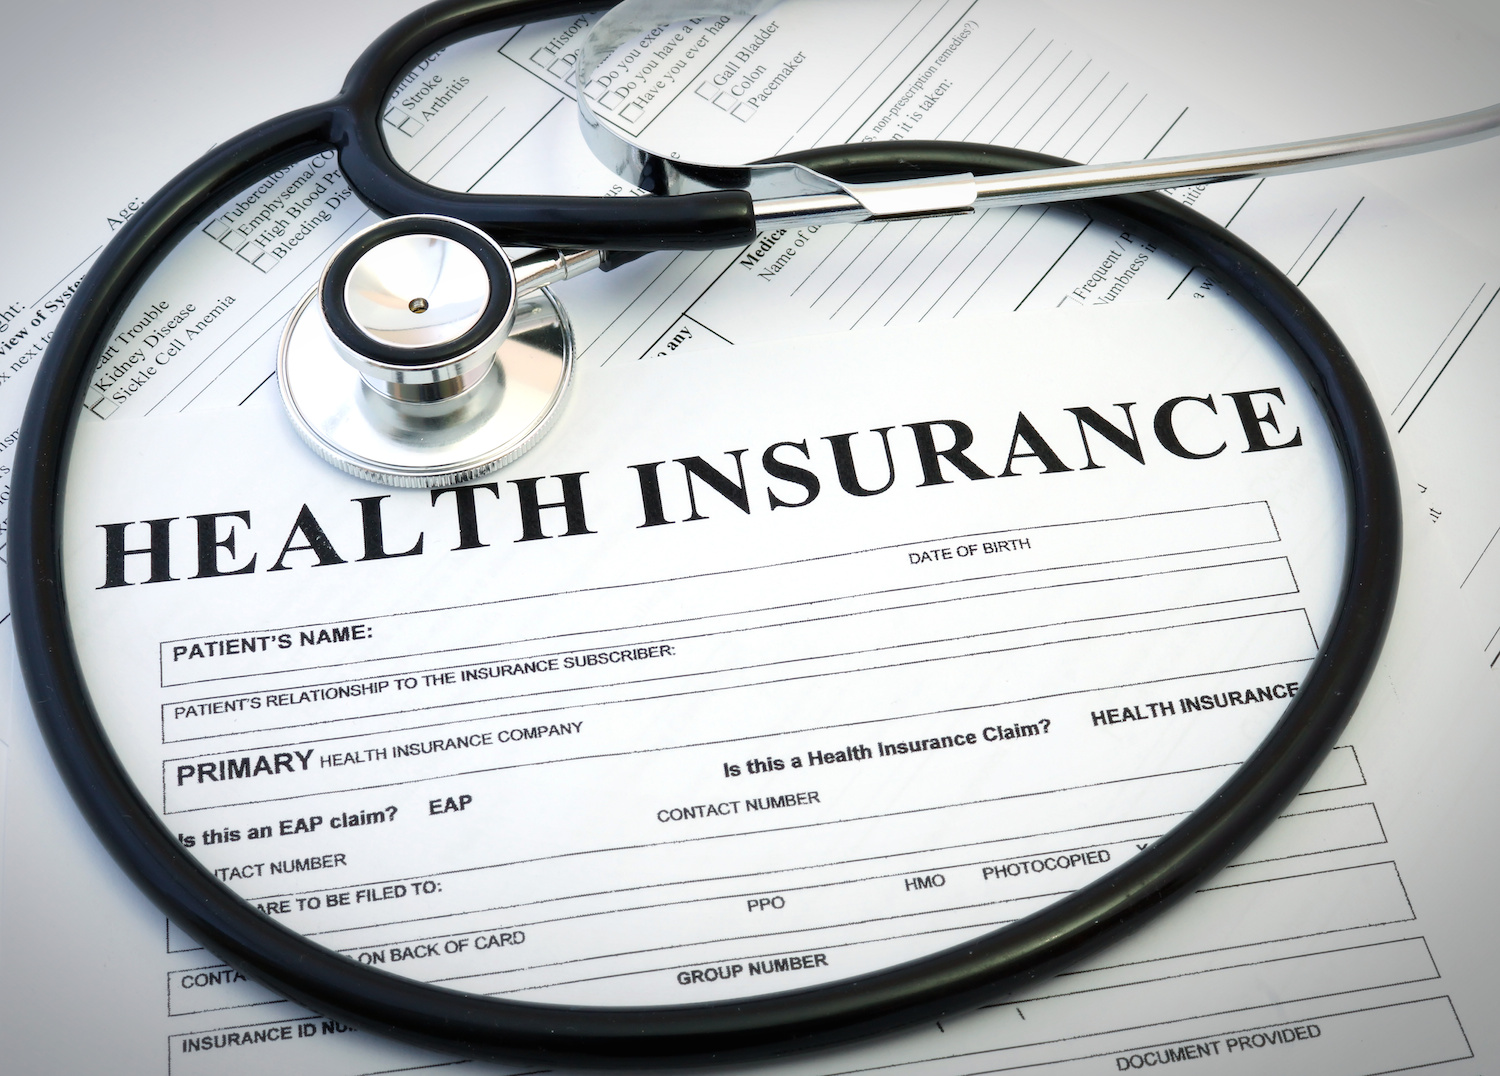

**Problem Statement: Predicting Health Insurance Costs**

An insurance company has given a task to develop a means to predict the medical insurance cost of an individual based on various factors.

The company wants to better understand the key variables that influence insurance costs and improve the accuracy of their cost predictions.


The dataset given contains information about individuals is as follows:

1.   age: age of primary beneficiary
2.   sex: sex of the insurace beneficiary
3.   BMI (Body Mass Index): Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
4.   children: number of dependents
5.   smoker: smoker or non-smoker
6.   region: the residential area of the beneficiary in the US



**Methodology**

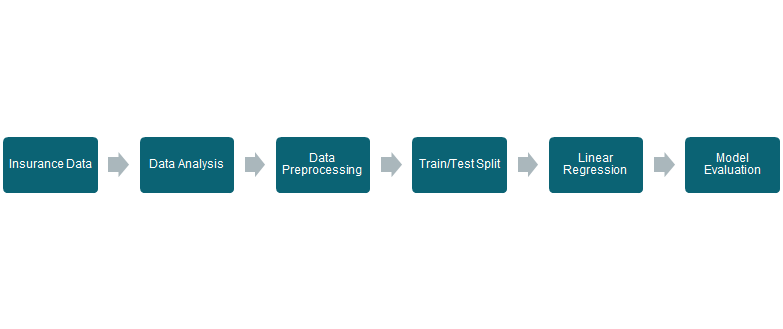

Importing the dependencies (libraries)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection & Analysis

In [ ]:
# Download the data
# wget https://www.kaggle.com/datasets/mirichoi0218/insurance/download?datasetVersionNumber=1

# Load data (csv file) into a Pandas Dataframe
insurance_df = pd.read_csv('insurance.csv')

In [ ]:
# First 5 rows of the dataframe
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Number of rows and columns
insurance_df.shape

(1338, 7)

In [ ]:
# Information on the dataset
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Data Analysis

In [ ]:
# Stastical measures of the dataset
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-79-268bae767f6d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_df['age'])


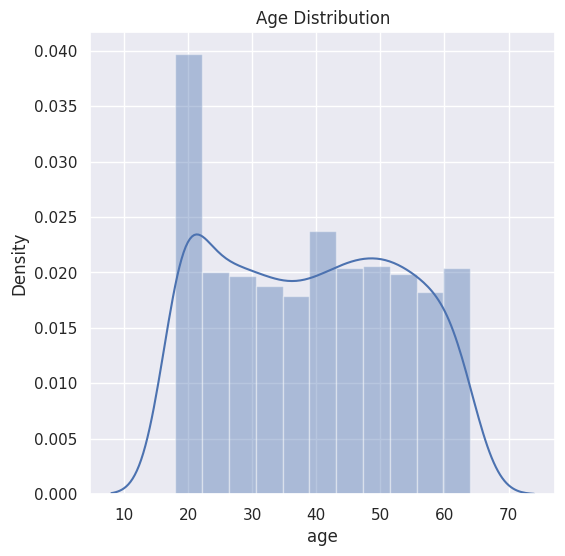

In [ ]:
# Find the distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_df['age'])
plt.title('Age Distribution')
plt.show()

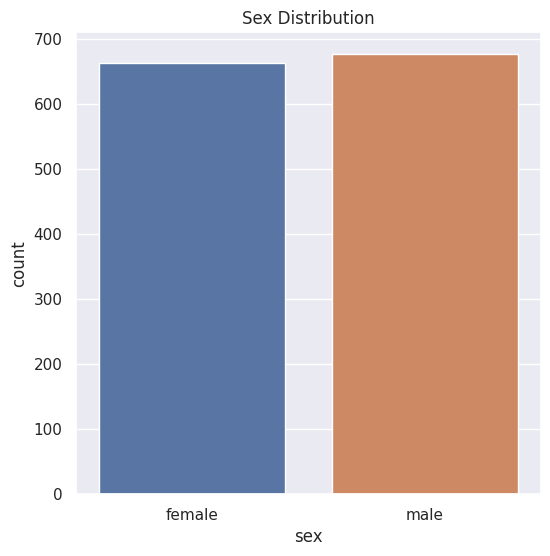

In [ ]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_df)
plt.title('Sex Distribution')
plt.show()

In [ ]:
insurance_df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<ipython-input-82-8415e3c6e08b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_df['bmi'])


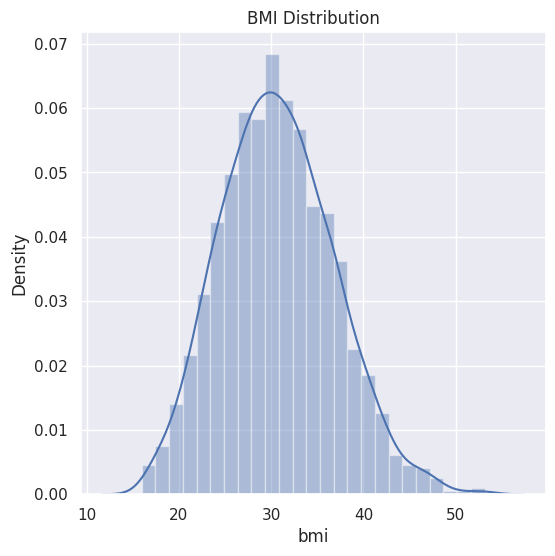

In [ ]:
# BMI distribution in the dataset
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_df['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI Range --> 18.5 to 24.9

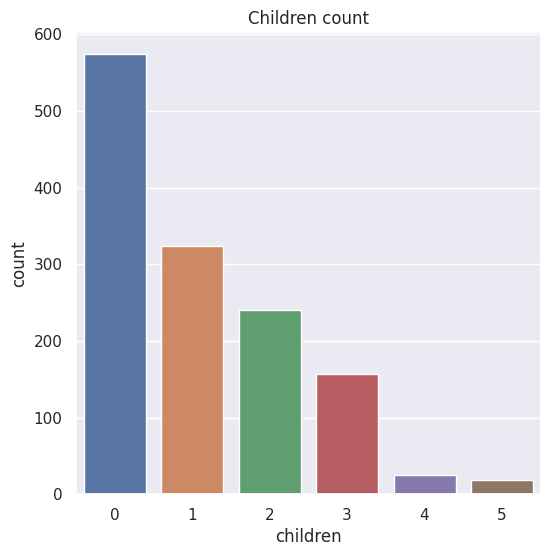

In [ ]:
# Children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_df)
plt.title('Children count')
plt.show()

In [ ]:
insurance_df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

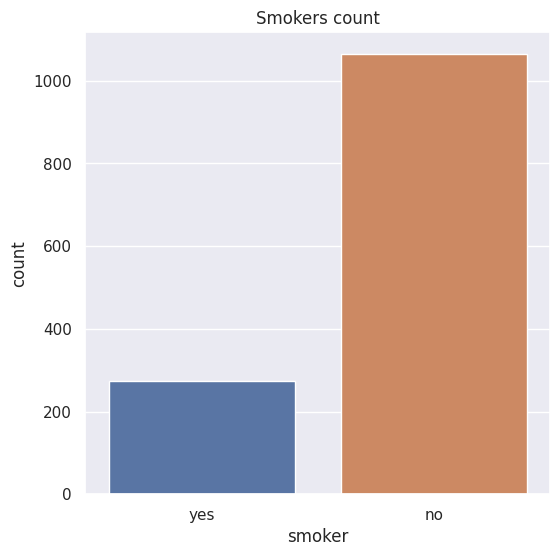

In [ ]:
# Smokers column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_df)
plt.title('Smokers count')
plt.show()

In [ ]:
insurance_df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

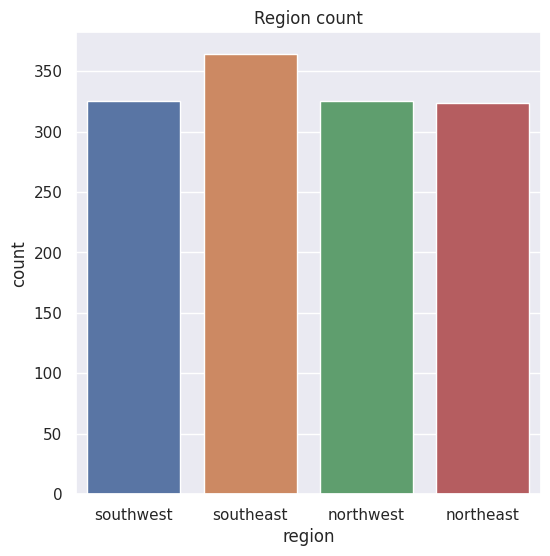

In [ ]:
# Region Column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_df)
plt.title('Region count')
plt.show()

In [ ]:
insurance_df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<ipython-input-89-49e873308842>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_df['charges'])


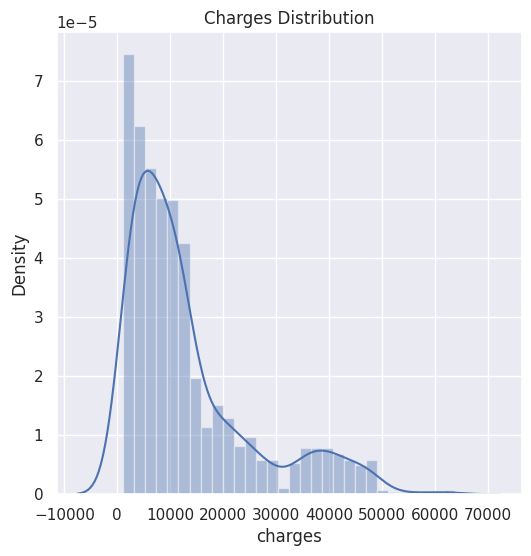

In [ ]:
# Charges distribution in the dataset
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_df['charges'])
plt.title('Charges Distribution')
plt.show()

Data Preprocessing

Encoding the categorical features

In [ ]:
# Check for missing values
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Categorical Features:
- Sex
- Smoker
- Region

In [ ]:
# Encoding sex column
insurance_df.replace({'sex':{'male':0, 'female':1}}, inplace=True)

# Encoding smoker column
insurance_df.replace({'smoker':{'no':0, 'yes':1}}, inplace=True)

# Encoding region column
insurance_df.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

In [ ]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


Split the features and the target variable

In [ ]:
X = insurance_df.drop(columns='charges', axis=1)
Y = insurance_df['charges']

In [ ]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,0,33.770,1,0,0
2,28,0,33.000,3,0,0
3,33,0,22.705,0,0,3
4,32,0,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3
1334,18,1,31.920,0,0,2
1335,18,1,36.850,0,0,0
1336,21,1,25.800,0,0,1


In [ ]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

Split data into Training & Testing Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


**Model Training- Linear regression**

In [ ]:
# Create an instance of the Regression class
linear_regression = LinearRegression()
linear_regression.fit(X_train, Y_train)

LinearRegression()

**Model Evaluation**

R-squared(R2)

In [ ]:
# Prediction on training data
training_data_prediction = linear_regression.predict(X_train)

In [ ]:
# Find the r-squared value
# The essence of finding the value is to tell how well fit the model i
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print(f'r-squared value: {r2_train}')

r-squared value: 0.751505643411174


In [ ]:
# Prediction on test data
Y_predicted = linear_regression.predict(X_test)

In [ ]:
# Find the r-squared value
# The value shows how good the model performs on unseen data
r2_test = metrics.r2_score(Y_test, Y_predicted)
print('r-squared value:', r2_test)

r-squared value: 0.7447273869684076


Mean Average Error (MAE)

A lower MAE relative to a baseline MAE suggests the model performs well and makes accurate predictions

In [ ]:
# Calculate mean baseline
baseline_prediction = np.mean(Y_train)

# Create an array of baseline predictions (same length as test set)
baseline_predictions = np.full_like(Y_test, baseline_prediction)

# Calculate MAE for the baseline
baseline_mae = metrics.mean_absolute_error(Y_test, baseline_predictions)

print('Mean Baseline MAE:', baseline_mae)


Mean Baseline MAE: 9312.878687589713


In [ ]:
mae = metrics.mean_absolute_error(Y_test, Y_predicted)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 4267.213826730733


Mean Squared Error (MSE)

In [ ]:
mse = metrics.mean_squared_error(Y_test, Y_predicted)
print('Mean Squared Error:', mse)

Mean Squared Error: 38337035.48643885


**Metrics Summary**

In [ ]:
metrics = {'R-squared': [r2_test],
           'Baseline MAE' : [baseline_mae],
           'MAE' :  [mae],
           'MSE' :[mse]}

metrics_df = pd.DataFrame(metrics)
metrics_df

,R-squared,Baseline MAE,MAE,MSE
0,0.744727,9312.878688,4267.213827,3.833704e+07


Building a predictive system

In [ ]:
input_data = (31, 1, 25.74, 0,0,0)

# change input data into a numpy array

input_data_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_array.reshape(1,-1)

prediction = linear_regression.predict(input_data_reshaped)
print(prediction)
print(f'The insurance cost is USD {prediction[0]}')

[3760.0805765]
The insurance cost is USD 3760.080576496057


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Conclusion**

In conclusion, our linear regression model successfully predicts medical insurance costs based on key features such as age, BMI, smoker status, and region. While the model provides valuable insights, there is room for improvement. Future work may involve exploring additional features and experimenting with alternative algorithms to enhance predictive accuracy. This project contributes to a better understanding of insurance cost determinants, offering opportunities for informed decision-making and continual refinement of our predictive model.